# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.4213,  0.8362,  0.2824,  0.4419,  0.6788,  0.3565,  0.5552,  0.2268,  0.8473,  0.6075,
        0.5624,  0.3371,  0.0451,  0.7305,  0.1932,  0.939 ,  0.2033,  0.5174,  0.5831,  0.9688,
        0.8669,  0.622 ,  0.2141,  0.703 ,  0.8779,  0.0796,  0.3383,  0.21  ,  0.372 ,  0.0625])

In [6]:
y

array([  9.2638,  10.5086,   8.8471,   9.3257,  10.0365,   9.0694,   9.6656,   8.6804,  10.542 ,
         9.8225,   9.6872,   9.0113,   8.1354,  10.1914,   8.5795,  10.817 ,   8.61  ,   9.5521,
         9.7494,  10.9063,  10.6008,   9.866 ,   8.6422,  10.1091,  10.6336,   8.2389,   9.0149,
         8.6299,   9.1159,   8.1876])

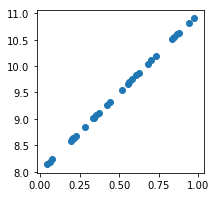

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.0235

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani